In [1]:
# This file is used to wash data, step 1, create average temperature.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./csv_ave/4_ave.csv")
df.columns = df.iloc[0] 
df = df[1:].reset_index(drop=True)
df = df.iloc[:,:3]
df.columns = [ "t1", "t2", "t3"]
df = df.astype({'t1':float, 't2':float, 't3':float})
df['ave'] = (df['t1'] + df['t2'] + df['t3']) / 3
print(df)


            t1       t2       t3         ave
0       68.545   61.464   59.847   63.285333
1       68.606   61.464   59.786   63.285333
2       68.545   61.525   59.847   63.305667
3       68.575   61.495   59.847   63.305667
4       68.667   61.586   59.816   63.356333
...        ...      ...      ...         ...
22092  141.940  133.000  142.830  139.256667
22093  142.000  133.030  142.860  139.296667
22094  142.000  133.000  142.890  139.296667
22095  142.000  133.000  142.860  139.286667
22096  142.030  133.000  142.890  139.306667

[22097 rows x 4 columns]


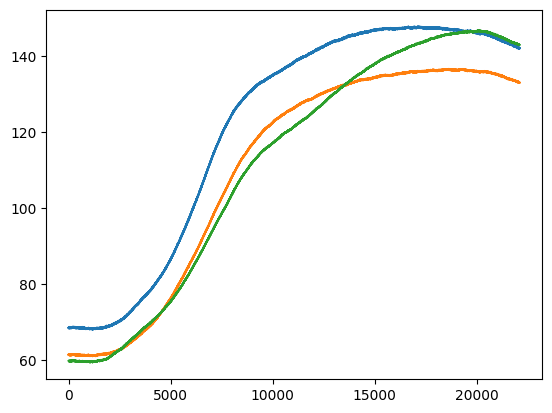

In [3]:
plt.plot(df['t1'])
plt.plot(df['t2'])
plt.plot(df['t3'])

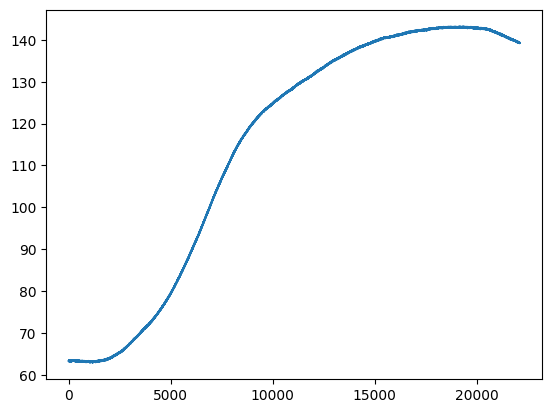

In [4]:
plt.plot(df['ave'])

In [17]:
df = pd.read_csv("all_c6.csv")
df['braking_time'] = [ 12, 	22.1, 	35.7,	49.1,
	61.8,	78.4,	60.5,	78.4,
	96.9,	120.1,	26.4,	35.4,
	44.6,	57.7,	25.9,	35,
	44.6,	57.5,	12.5,	22.4,
	35.3,	47.8,	60,     76.8, 59.5]

df = df.drop( [24])
df = df.drop( df.index[6:18])

df.to_csv("all_c6_new.csv")

In [2]:
import os
import pdfplumber
import pandas as pd

data = []

with pdfplumber.open("C6.pdf") as pdf:
     for page in pdf.pages:
         table = page.extract_table()
         if table:
             data.extend(table)
df = pd.DataFrame(data)
df.to_csv(f'C6.csv', index = False)